In [3]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv(r"C:\Users\jnj\Desktop\data_science\Machine Learning Projects\2_Email Spam Classifier\spam.csv", encoding='latin-1')

In [12]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
647,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,NaN,NaN,NaN
265,ham,Same. Wana plan a trip sometme then,NaN,NaN,NaN
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t...",NaN,NaN,NaN
3650,ham,Want to send me a virtual hug?... I need one,NaN,NaN,NaN


Data Cleaning

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [20]:
data.head(10)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [16]:
data.rename(columns={"v1": "target" , "v2": "message"}, inplace= True)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [21]:
data.isnull().sum()

target     0
message    0
dtype: int64

In [24]:
data.duplicated().sum()

np.int64(0)

In [23]:
data = data.drop_duplicates(keep='first')

In [25]:
data.shape

(5169, 2)

EDA

In [26]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

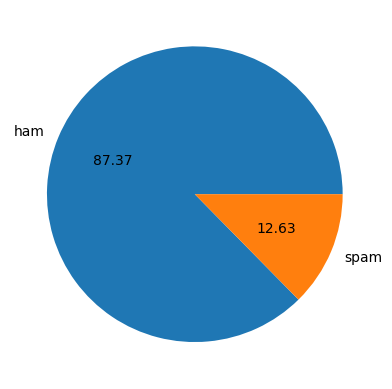

In [27]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [68]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jnj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jnj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jnj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
data['char_count'] = data['message'].apply(len)

In [34]:
data['word_count'] = data['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [36]:
data['sentence_count'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [37]:
data.head()

,target,message,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
# describing ham messages
data[data['target'] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# describibng spam messages
data[data['target'] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text Preprocessing

In [58]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def convert(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return "".join(y)

In [69]:
data['transformed_text'] = data['message'].apply(convert)

In [71]:
data['transformed_text'] = data['transformed_text'].apply(lambda x: ' '.join(x))


In [73]:
data.head()

,target,message,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [74]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

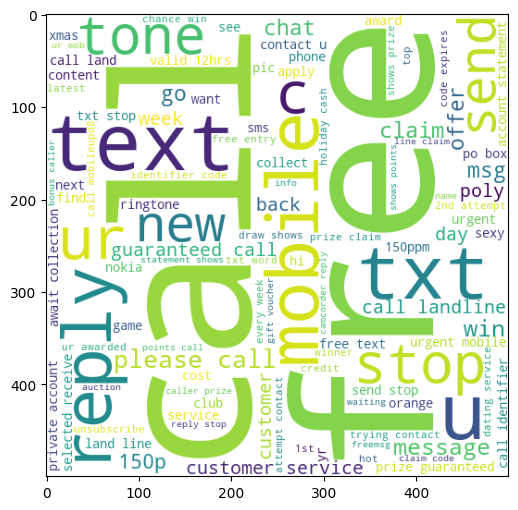

In [76]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

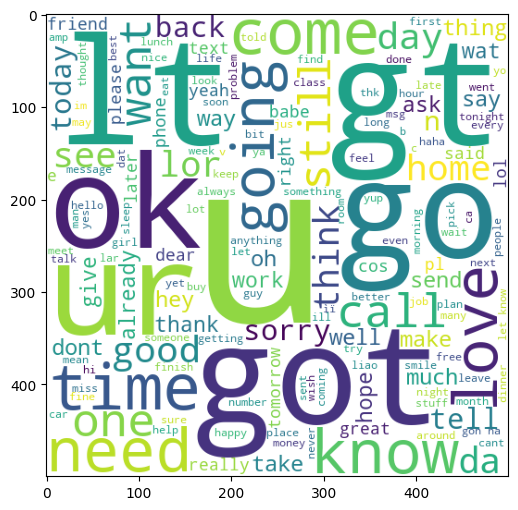

In [77]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [78]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [82]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 302),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 119),
 ('ur', 119),
 ('mobile', 105),
 ('text', 104),
 ('stop', 104),
 ('4', 97),
 ('claim', 96),
 ('reply', 96),
 ('prize', 81),
 ('get', 70),
 ('new', 64),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('cash', 51),
 ('contact', 51),
 ('please', 49),
 ('service', 48),
 ('win', 47),
 ('c', 45),
 ('phone', 43),
 ('guaranteed', 42),
 ('per', 41),
 ('week', 40),
 ('customer', 40),
 ('tone', 38)]

In [84]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

Counter(ham_corpus).most_common(30)

[('u', 883),
 ('get', 293),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('go', 240),
 ('got', 236),
 ('know', 225),
 ('like', 221),
 ('ok', 217),
 ('good', 212),
 ('come', 211),
 ('ur', 197),
 ('time', 188),
 ('call', 184),
 ('love', 172),
 ('day', 166),
 ('going', 164),
 ('want', 159),
 ('lor', 159),
 ('one', 158),
 ('4', 156),
 ('home', 152),
 ('need', 151),
 ('still', 143),
 ('da', 141),
 ('see', 135),
 ('back', 127),
 ('think', 126),
 ('today', 121)]

Model Building

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [104]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8839458413926499
[[801  95]
 [ 25 113]]
0.5432692307692307


In [105]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [106]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [107]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))